In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [32]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\HP\cars prediction\car data.csv")

In [34]:
# Step 3: Show first 5 rows
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [36]:
# Step 4: Check for null values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [38]:
# Step 5: Label Encoding
le = LabelEncoder()

In [40]:
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [42]:
# Step 6: Feature Selection
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

In [44]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Step 8: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Step 9: Prediction
y_pred = model.predict(X_test)


In [50]:
# Step 10: Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8466902419662691
MAE: 1.221932362175757
MSE: 3.5315798889712546
RMSE: 1.879249820798516


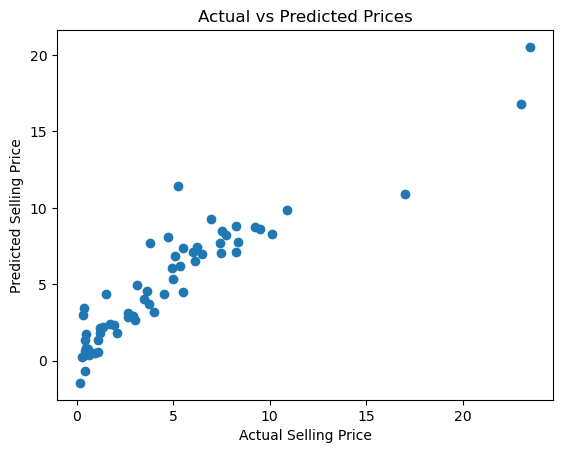

In [52]:
# Step 11: Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Prices")
plt.show()